* Explore the dataset - EDA
* Wrangle dataset - Cleaning dataset
* Build a regression model to predict insurance price
* Model interpretation
* Create amazing visualization using plotly, seaborn, tableau
* Deploy project using flask and/or plotly using Heroku

In [1]:
import pandas as pd

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/EvidenceN/Insurance_premium_prediction/master/data/auto_insurance_data.csv")

In [3]:
pd.options.display.max_columns = 999

In [4]:
insurance.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
insurance.shape

(9134, 24)

In [6]:
from pandas_profiling import ProfileReport

In [7]:
#profile = ProfileReport(insurance)

In [8]:
#profile

In [9]:
insurance.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

## Exploratory Data Analysis & Wrangling 

* Data Wrangling Function
    * Change insurance effective to date column to datetime. 
    * Drop customer and Effective to date, Response.

* Create a function for splitting the data. Train, test, validation

* Create a function for Encoding the data. 
    * encode coverage column from categorical to integer
    * Combine college and bachelor for clarification and easier assessment
    * encoding education column from categorical into integers
    * Use one hot encoding to encode employment status
    * One hot encoding to encode Gender column
    * Onehotencoding location code column.
    * One hot encoding for these column "Marital Status", "Policy Type", "Policy", "Sales Channel", "Vehicle Class", 'State column'


* Function for changing column names after encoding
    * changing employement status column names on train & test dataset
    * Change column names in gender column
    * Rename state columns 
    

* Function for rounding various series
    * columns to round - lifetime value, monthly premium, total claim amount

* Function for scatter plot visualization. 

## Building the models. For insurance premium

* Function to split X data and Y data for both Y variables. 
    * Drop Y variables from X data
    * X data is ONLY the top 5-10 features. Drop everything else.  

* Function for Baseline Model. 

* Function for random forest regressor model. 

* Bring the function for shapely over. 

## Function for Visualization. 


## Customer Lifetime Value 
* Use existing function for new y_target, baseline, for random forest model. 
* Include Renew Offer Type column because it might help predict customer lifetime value. 

### Next WEEK, Continue refactoring, and then start Plotly App. After building plotly app, then come back and try improving model. 


    

In [10]:
insurance.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Cleaning the Data a Little Bit

In [11]:
# Data Wrangling Function
# Change insurance effective to date column to datetime and store in new column called activation_date.
# Drop customer and Effective to date, # Response.

def Wrangle(dataframe):
    
    """Data Wrangling Function
    Change insurance effective to date 
    column to datetime and store in new column called 
    activation_date.
    Drop customer and Effective to date, # Response."""
    
    data = dataframe.copy()
    
    data["activation_date"] = pd.to_datetime(data["Effective To Date"], 
                                                  infer_datetime_format = True)
    
    data = data.drop(columns = ["Customer",
                                "Effective To Date",
                                'Response'])
    
    return data

In [12]:
insurance2 = Wrangle(insurance)

In [13]:
insurance2.head()

,State,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,activation_date
0,Washington,2763.519279,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011-02-24
1,Arizona,6979.535903,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011-01-31
2,Nevada,12887.431650,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011-02-19
3,California,7645.861827,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011-01-20
4,Washington,2813.692575,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011-02-03


## Function for Splitting the Data

In [14]:
def split_data(dataframe):
    
    # split data into train, test, 
    # validation dataset before proceeding. 

    from sklearn.model_selection import train_test_split
    
    data = dataframe.copy()
    
    train, test = train_test_split(data, 
                                   train_size = 0.85, 
                                   test_size=0.15, 
                                   random_state=42)

    # validation dataset

    train, val = train_test_split(train, 
                                  train_size = 0.85, 
                                  test_size=0.15, 
                                  random_state=42)
    
    return train, test, val

In [15]:
train, test, val = split_data(insurance2)

In [16]:
val.head()

,State,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,activation_date
7802,Arizona,6285.154760,Extended,College,Employed,M,52210,Suburban,Married,80,6,74,0,9,Personal Auto,Personal L1,Offer1,Branch,384.000000,Four-Door Car,Medsize,2011-02-28
3193,Oregon,2867.312197,Extended,Bachelor,Retired,F,23376,Suburban,Divorced,78,19,18,0,1,Personal Auto,Personal L3,Offer2,Call Center,374.400000,Four-Door Car,Medsize,2011-01-03
4371,Arizona,2537.383207,Basic,Bachelor,Employed,M,92401,Rural,Divorced,64,30,37,0,1,Personal Auto,Personal L1,Offer4,Agent,50.359627,Four-Door Car,Medsize,2011-01-30
6757,Oregon,2918.576189,Basic,College,Employed,M,80714,Suburban,Married,72,18,12,0,1,Personal Auto,Personal L3,Offer2,Web,345.600000,Four-Door Car,Small,2011-02-24
4587,Oregon,11981.984810,Basic,Master,Retired,F,21514,Urban,Married,62,0,59,0,2,Personal Auto,Personal L2,Offer1,Agent,257.248789,Two-Door Car,Medsize,2011-01-20


In [17]:
insurance2.shape

(9134, 22)

In [18]:
train.shape

(6598, 22)

In [19]:
test.shape

(1371, 22)

In [20]:
val.shape

(1165, 22)

## Function for Encoding Various Columns

In [21]:
def encode(train_data, test_data, val_data):
    
    # function to encode some columns using ordinal encoding, 
    # and other using onehotencoding. 
    
    train = train_data.copy()
    test = test_data.copy()
    val = val_data.copy()
    
    import category_encoders as ce
    
    # use ordinal encoding to do encode "coverage" column
    
    coverage_dictionary = [
        {'col': 'Coverage',
         'mapping':{"Basic":1, 
                    "Extended":2, 
                    "Premium": 3}}]

    coverage_encoder = ce.OrdinalEncoder(
        cols="Coverage", 
        mapping=coverage_dictionary)
    
    
    train_encoded = coverage_encoder.fit_transform(train)
    test_encoded = coverage_encoder.transform(test)
    val_encoded = coverage_encoder.transform(val)
    
    # combine college and bachelor into one datatype
    train_encoded['Education'] = train_encoded['Education'].replace(
        {"College":"Bachelor"})
    test_encoded['Education'] = test_encoded['Education'].replace(
        {"College":"Bachelor"})
    val_encoded['Education'] = val_encoded['Education'].replace(
        {"College":"Bachelor"})
    
    # encoding "education" column from categorical into integers

    education_dictionary = [
        {'col': 'Education',
         'mapping':{"High School or Below":1,
                    "Bachelor":2, 
                    "Master": 3,
                    "Doctor": 4}}]

    education_encoder = ce.OrdinalEncoder(
        cols="Education",
        mapping=education_dictionary)

    train_encoded = education_encoder.fit_transform(train_encoded)
    test_encoded = education_encoder.transform(test_encoded)
    val_encoded = education_encoder.transform(val_encoded)
    
    # encoding vehicle column from categorical into integers using ordinal encoding because
    # large, medium, small indicates a natural order. 

    vehicle_dictionary = [{'col': 'Vehicle Size',
                           'mapping':{"Small":1,
                                      "Medsize":2, 
                                      "Large": 3}}]

    vehicle_encoder = ce.OrdinalEncoder(cols="Vehicle Size", 
                                        mapping=vehicle_dictionary)

    train_encoded = vehicle_encoder.fit_transform(train_encoded)
    test_encoded = vehicle_encoder.transform(test_encoded)
    val_encoded = vehicle_encoder.transform(val_encoded)
    
    # one hot encoding columns
    columns_to_encode = ["Marital Status",
                         "Policy Type", 
                         "Policy", 
                         "Sales Channel", 
                         "Vehicle Class",
                         "Gender",
                         "Location Code",
                         "EmploymentStatus",
                         "Renew Offer Type",
                         "State"]
    
    
    # Encode columns above with one hot encoding
    # order doesn't matter in this columns situation

    columns_encoder = ce.OneHotEncoder(cols = columns_to_encode, 
                                       use_cat_names=True)

    train_encoded = columns_encoder.fit_transform(train_encoded)
    test_encoded = columns_encoder.transform(test_encoded)
    val_encoded = columns_encoder.transform(val_encoded)
    
    return train_encoded, test_encoded, val_encoded
    

Create a function for Encoding the data.

~~encode coverage column from categorical to integer~~
    
~~Combine college and bachelor for clarification and easier assessment~~

~~encoding education column from categorical into integers~~

~~Use one hot encoding to encode employment status~~

~~One hot encoding to encode Gender column~~

~~Onehotencoding location code column.~~

~~One hot encoding for these column "Marital Status", "Policy Type", "Policy", "Sales Channel", "Vehicle Class", 'State column'~~



In [22]:
train_encoded, test_encoded, val_encoded = encode(train, test, val)

In [23]:
train_encoded.head()

,State_Arizona,State_Oregon,State_California,State_Nevada,State_Washington,Customer Lifetime Value,Coverage,Education,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Unemployed,EmploymentStatus_Disabled,EmploymentStatus_Retired,Gender_M,Gender_F,Income,Location Code_Urban,Location Code_Rural,Location Code_Suburban,Marital Status_Married,Marital Status_Divorced,Marital Status_Single,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type_Personal Auto,Policy Type_Corporate Auto,Policy Type_Special Auto,Policy_Personal L3,Policy_Corporate L3,Policy_Corporate L2,Policy_Corporate L1,Policy_Personal L2,Policy_Special L3,Policy_Personal L1,Policy_Special L2,Policy_Special L1,Renew Offer Type_Offer2,Renew Offer Type_Offer1,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Call Center,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Web,Total Claim Amount,Vehicle Class_Two-Door Car,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Four-Door Car,Vehicle Class_Luxury SUV,Vehicle Class_Luxury Car,Vehicle Size,activation_date
5249,1,0,0,0,0,4786.889347,1,2,1,0,0,0,0,1,0,45515,1,0,0,1,0,0,61,14,33,0,9,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,236.907007,1,0,0,0,0,0,3,2011-01-02
2077,1,0,0,0,0,8838.085637,1,2,1,0,0,0,0,1,0,82664,0,1,0,1,0,0,114,24,10,3,9,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,133.425609,0,1,0,0,0,0,2,2011-01-21
6357,0,1,0,0,0,11638.899470,1,2,0,1,0,0,0,0,1,25370,0,0,1,1,0,0,102,10,77,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,489.600000,0,0,1,0,0,0,3,2011-01-26
8128,0,0,1,0,0,4670.953723,1,2,0,0,1,0,0,0,1,0,1,0,0,0,1,0,64,25,89,0,4,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,181.810486,0,0,0,1,0,0,2,2011-02-15
6787,1,0,0,0,0,2352.367900,1,2,0,0,1,0,0,0,1,0,0,0,1,0,1,0,64,4,61,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,381.062306,0,0,0,1,0,0,2,2011-01-19


In [24]:
train.shape

(6598, 22)

In [25]:
train_encoded.shape

(6598, 56)

~~* Function for changing column names after encoding
    * changing employement status column names on train & test dataset
    * Change column names in gender column
    * Rename state columns~~
    

~~* Function for rounding various series
    * columns to round - lifetime value, monthly premium, total claim amount~~


## Function for renaming columns

In [26]:
def change_name(train_encoded, test_encoded, val_encoded):
    
    """Renaming the columns after encoding into 
    something shorter. 
    
    The input is the encoded dataframe or any dataframe that
    needs to be renamed. """

    
    # creating a copy of the dataset. 
    train = train_encoded.copy()
    test = test_encoded.copy()
    val = val_encoded.copy()
    
    columns_to_rename = {
        "State_Arizona":"Arizona", 
         "State_Oregon": "Oregon",
         "State_California": "California",
         "State_Nevada": "Nevada",
         "State_Washington": "Washington", 
         "Marital Status_Married": "Married", 
         "Marital Status_Divorced":"Divorced",
         "Marital Status_Single": "Single",
         "Policy Type_Personal Auto": "Personal Auto",
         "Policy Type_Corporate Auto": "Corporate Auto",
         "Policy Type_Special Auto": "Special Auto",
         "Policy_Personal L3": "Personal L3", 
         "Policy_Corporate L3": "Corporate L3",
         "Policy_Corporate L2": "Corporate L2",
         "Policy_Corporate L1": "Corporate L1",
         "Policy_Personal L2": "Personal L2",
         "Policy_Personal L1": "Personal L1",
         "Policy_Special L1": "Special L1",
         "Policy_Special L2": "Special L2",
         "Policy_Special L3": "Special L3",
         "Sales Channel_Call Center": "Call Center",
         "Sales Channel_Agent": "Agent",
         "Sales Channel_Web": "Web",
         "Sales Channel_Branch": "Branch",
         "Vehicle Class_Two-Door Car": "Two Door",
         "Vehicle Class_SUV": "SUV",
         "Vehicle Class_Sports Car": "Sports Car",
         "Vehicle Class_Four-Door Car": "Four Door",
         "Vehicle Class_Luxury SUV": "Luxury SUV",
         "Vehicle Class_Luxury Car": "Luxury Car",
         "Location Code_Urban": "Urban", 
         "Location Code_Rural": "Rural", 
         "Location Code_Suburban":"Suburban",
         "Gender_M": "Male", 
         "Gender_F": "Female",
         "EmploymentStatus_Employed": "Employed", 
         "EmploymentStatus_Unemployed": "Unemployed",
         "EmploymentStatus_Disabled": "Disabled", 
         "EmploymentStatus_Retired": "Retired",
         "EmploymentStatus_Medical Leave": "Medical_Leave",
         'Renew Offer Type_Offer2': 'Renew offer 1',
         'Renew Offer Type_Offer1': 'Renew offer 2',
         'Renew Offer Type_Offer3': 'Renew offer 3',
         'Renew Offer Type_Offer4': 'Renew offer 4'}
    
    train = train.rename(columns = columns_to_rename)
    test = test.rename(columns = columns_to_rename)
    val = val.rename(columns = columns_to_rename)
    
    return train, test, val

In [27]:
train2, test2, val2 = change_name(train_encoded, 
                                  test_encoded, 
                                  val_encoded)

In [28]:
train_encoded.head()

,State_Arizona,State_Oregon,State_California,State_Nevada,State_Washington,Customer Lifetime Value,Coverage,Education,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Unemployed,EmploymentStatus_Disabled,EmploymentStatus_Retired,Gender_M,Gender_F,Income,Location Code_Urban,Location Code_Rural,Location Code_Suburban,Marital Status_Married,Marital Status_Divorced,Marital Status_Single,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type_Personal Auto,Policy Type_Corporate Auto,Policy Type_Special Auto,Policy_Personal L3,Policy_Corporate L3,Policy_Corporate L2,Policy_Corporate L1,Policy_Personal L2,Policy_Special L3,Policy_Personal L1,Policy_Special L2,Policy_Special L1,Renew Offer Type_Offer2,Renew Offer Type_Offer1,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Call Center,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Web,Total Claim Amount,Vehicle Class_Two-Door Car,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Four-Door Car,Vehicle Class_Luxury SUV,Vehicle Class_Luxury Car,Vehicle Size,activation_date
5249,1,0,0,0,0,4786.889347,1,2,1,0,0,0,0,1,0,45515,1,0,0,1,0,0,61,14,33,0,9,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,236.907007,1,0,0,0,0,0,3,2011-01-02
2077,1,0,0,0,0,8838.085637,1,2,1,0,0,0,0,1,0,82664,0,1,0,1,0,0,114,24,10,3,9,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,133.425609,0,1,0,0,0,0,2,2011-01-21
6357,0,1,0,0,0,11638.899470,1,2,0,1,0,0,0,0,1,25370,0,0,1,1,0,0,102,10,77,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,489.600000,0,0,1,0,0,0,3,2011-01-26
8128,0,0,1,0,0,4670.953723,1,2,0,0,1,0,0,0,1,0,1,0,0,0,1,0,64,25,89,0,4,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,181.810486,0,0,0,1,0,0,2,2011-02-15
6787,1,0,0,0,0,2352.367900,1,2,0,0,1,0,0,0,1,0,0,0,1,0,1,0,64,4,61,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,381.062306,0,0,0,1,0,0,2,2011-01-19


In [29]:
train2.head()

,Arizona,Oregon,California,Nevada,Washington,Customer Lifetime Value,Coverage,Education,Employed,Medical_Leave,Unemployed,Disabled,Retired,Male,Female,Income,Urban,Rural,Suburban,Married,Divorced,Single,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Personal Auto,Corporate Auto,Special Auto,Personal L3,Corporate L3,Corporate L2,Corporate L1,Personal L2,Special L3,Personal L1,Special L2,Special L1,Renew offer 1,Renew offer 2,Renew offer 3,Renew offer 4,Call Center,Agent,Branch,Web,Total Claim Amount,Two Door,SUV,Sports Car,Four Door,Luxury SUV,Luxury Car,Vehicle Size,activation_date
5249,1,0,0,0,0,4786.889347,1,2,1,0,0,0,0,1,0,45515,1,0,0,1,0,0,61,14,33,0,9,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,236.907007,1,0,0,0,0,0,3,2011-01-02
2077,1,0,0,0,0,8838.085637,1,2,1,0,0,0,0,1,0,82664,0,1,0,1,0,0,114,24,10,3,9,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,133.425609,0,1,0,0,0,0,2,2011-01-21
6357,0,1,0,0,0,11638.899470,1,2,0,1,0,0,0,0,1,25370,0,0,1,1,0,0,102,10,77,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,489.600000,0,0,1,0,0,0,3,2011-01-26
8128,0,0,1,0,0,4670.953723,1,2,0,0,1,0,0,0,1,0,1,0,0,0,1,0,64,25,89,0,4,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,181.810486,0,0,0,1,0,0,2,2011-02-15
6787,1,0,0,0,0,2352.367900,1,2,0,0,1,0,0,0,1,0,0,0,1,0,1,0,64,4,61,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,381.062306,0,0,0,1,0,0,2,2011-01-19


## Function for rounding column values

In [30]:
def round_values(train, test, val):
    
    """
    A function that will round the values in some columns
    
    provide the dataset, and the columns below will be rounded
    """
    
    # creating a copy of the dataset. 
    train_round = train.copy()
    test_round = test.copy()
    val_round = val.copy()
    
    train_round = train_round.round(
        {"Customer Lifetime Value": 2,
         "Total Claim Amount": 2})
    
    test_round = test_round.round(
        {"Customer Lifetime Value": 2,
         "Total Claim Amount": 2})
    
    val_round = val_round.round(
        {"Customer Lifetime Value": 2,
         "Total Claim Amount": 2})
    
    return train_round, test_round, val_round
    

In [31]:
train2, test2, val2 = round_values(train2, test2, val2)

In [32]:
train2.head()

,Arizona,Oregon,California,Nevada,Washington,Customer Lifetime Value,Coverage,Education,Employed,Medical_Leave,Unemployed,Disabled,Retired,Male,Female,Income,Urban,Rural,Suburban,Married,Divorced,Single,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Personal Auto,Corporate Auto,Special Auto,Personal L3,Corporate L3,Corporate L2,Corporate L1,Personal L2,Special L3,Personal L1,Special L2,Special L1,Renew offer 1,Renew offer 2,Renew offer 3,Renew offer 4,Call Center,Agent,Branch,Web,Total Claim Amount,Two Door,SUV,Sports Car,Four Door,Luxury SUV,Luxury Car,Vehicle Size,activation_date
5249,1,0,0,0,0,4786.89,1,2,1,0,0,0,0,1,0,45515,1,0,0,1,0,0,61,14,33,0,9,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,236.91,1,0,0,0,0,0,3,2011-01-02
2077,1,0,0,0,0,8838.09,1,2,1,0,0,0,0,1,0,82664,0,1,0,1,0,0,114,24,10,3,9,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,133.43,0,1,0,0,0,0,2,2011-01-21
6357,0,1,0,0,0,11638.90,1,2,0,1,0,0,0,0,1,25370,0,0,1,1,0,0,102,10,77,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,489.60,0,0,1,0,0,0,3,2011-01-26
8128,0,0,1,0,0,4670.95,1,2,0,0,1,0,0,0,1,0,1,0,0,0,1,0,64,25,89,0,4,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,181.81,0,0,0,1,0,0,2,2011-02-15
6787,1,0,0,0,0,2352.37,1,2,0,0,1,0,0,0,1,0,0,0,1,0,1,0,64,4,61,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,381.06,0,0,0,1,0,0,2,2011-01-19


## Insurance Premium Model

In [33]:
## customer lifetime value and insurance premium as 
# target y variables. 

## Function to split dataframe into x_values and y_values

In [34]:
def x_y(train):
    
    """
    Function to split dataframe into x_values and y_values
    
    Define x variables and y variables"""
    
    y = train['Monthly Premium Auto']
    y2 = train['Customer Lifetime Value']
    
    # after initial models, these are the columns that has the 
    # most impact in predicting insurance premium and customer
    # lifetime value to insurance company
    
    important_columns = ["Luxury SUV", "Luxury Car", "Coverage", 
                    "Sports Car", "Two Door", "Four Door", 
                    "Months Since Policy Inception",
                    "Income", "Months Since Last Claim",
                    "Number of Policies", "Education", 
                    "Number of Open Complaints"]
    
    x = train[important_columns].copy()
    
    return y, y2, x
    

In [41]:
# Training Data
# premium_train = training data for insurance premium prediction
# CLV_train = training data for customer lifetime value
# x_train = x_data for customer lifetime value and insurance
# premium

premium_train, CLV_train, x_train = x_y(train2)

In [37]:
x_train.head()

,Luxury SUV,Luxury Car,Coverage,Sports Car,Two Door,Four Door,Months Since Policy Inception,Income,Months Since Last Claim,Number of Policies,Education,Number of Open Complaints
5249,0,0,1,0,1,0,33,45515,14,9,2,0
2077,0,0,1,0,0,0,10,82664,24,9,2,3
6357,0,0,1,1,0,0,77,25370,10,2,2,0
8128,0,0,1,0,0,1,89,0,25,4,2,0
6787,0,0,1,0,0,1,61,0,4,1,2,0


In [42]:
# Testing Data

premium_test, CLV_test, x_test = x_y(test2)

In [43]:
# Validation Data

premium_val, CLV_val, x_val = x_y(val2)

## Building the models. For insurance premium

~~* Function to split X data and Y data for both Y variables. 
    * Drop Y variables from X data
    * X data is ONLY the top 5-10 features. Drop everything else.~~  

### WHERE TO START NEXT WEEK
* Function for Baseline Model. 

* Function for random forest regressor model. 
* Maybe also create a function for linear regression model

* Bring the function for shapely over. 

Baseline Model for Insurance Premium

In [44]:
# mean baseline for insurance premium prediction

mean = premium_train.mean()
round(mean, 2)

5249    32.489845
2077   -20.510155
6357    -8.510155
8128    29.489845
6787    29.489845
          ...    
4219    31.489845
2665    10.489845
6345    -9.510155
7554     5.489845
7241    23.489845
Name: Monthly Premium Auto, Length: 6598, dtype: float64

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [58]:
# mean absolute error for training data

true_value = premium_train
predicted_value = [mean] * len(true_value)

mae_train_premium = mean_absolute_error(true_value, predicted_value)

print(f'By guessing, our insurance premium would be ${round(mean, 2)} \nand we would be off by ${round(mae_train_premium, 2)}')

By guessing, our insurance premium would be $93.49 
and we would be off by $25.39


In [59]:
# mean squared error for training data

true_value = premium_train
predicted_value = [mean] * len(true_value)

mse_train_premium = mean_squared_error(true_value, predicted_value)

print(f'By guessing, our insurance premium would be ${round(mean, 2)} \nand we would be off by ${round(mse_train_premium, 2)}')

By guessing, our insurance premium would be $93.49 
and we would be off by $1192.2


### Mean baseline; Mean absolute and mean squared error for testing data

In [66]:
# mean baseline for insurance premium prediction

mean_test = premium_test.mean()

# mean absolute error for testing data

true_value_test = premium_test
predicted_value_test = [mean_test] * len(true_value_test)

mae_test_premium = mean_absolute_error(true_value_test, 
                                       predicted_value_test)
print(f"Mean Absolute Error Test Data")
print(f"""By guessing, our insurance premium would,
be ${round(mean_test, 2)} and we would be off 
by ${round(mae_test_premium, 2)}\n""")

# mean squared error for testing data

mse_test_premium = mean_squared_error(true_value_test, 
                                      predicted_value_test)

print(f"Mean Squared Error Test Data")
print(f"""By guessing, our insurance premium would
be ${round(mean_test, 2)} and we would be off 
by ${round(mse_test_premium, 2)}""")



Mean Absolute Error Test Data
By guessing, our insurance premium would,
be $92.02 and we would be off 
by $24.3

Mean Squared Error Test Data
By guessing, our insurance premium would
be $92.02 and we would be off 
by $1152.71


**Random Forest Regressor Model for Insurance Premium**

In [81]:
y_train = premium_train
y_test = premium_test
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

# fitting random regression model

rfModel = rf.fit(x_train, y_train)

# predicting y_values using test dataset. 

y_pred_r = rfModel.predict(x_test)

Random Forest Regression MEAN prediction $92.0
Random Forest Regression mean absolute error $4.31
Random Forest Regression mean squared error $35.14


**Metrics for Random Forest Regressor model**

In [ ]:
mae_r = mean_absolute_error(y_test, y_pred_r)
mse_r = mean_squared_error(y_test, y_pred_r)
print(f'Random Forest Regression MEAN prediction ${round(y_pred_r.mean())}')
print(f'Random Forest Regression mean absolute error ${round(mae_r,2)}')
print(f"Random Forest Regression mean squared error ${round(mse_r,2)}")


**Visualization for Random Forest Regressor model for Insurane Premium**

In [75]:
# Visualization for Random Forest model.
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [74]:
# interpreting random forest model. 

importances = rfModel.feature_importances_

# columns used in random forest model.
columns = x_train.columns

# series between columns and feature importances

rfGraph = pd.Series(importances, columns)

Text(0.5, 1.0, 'Visualization for Random Forest Regression Model Feature Importances')

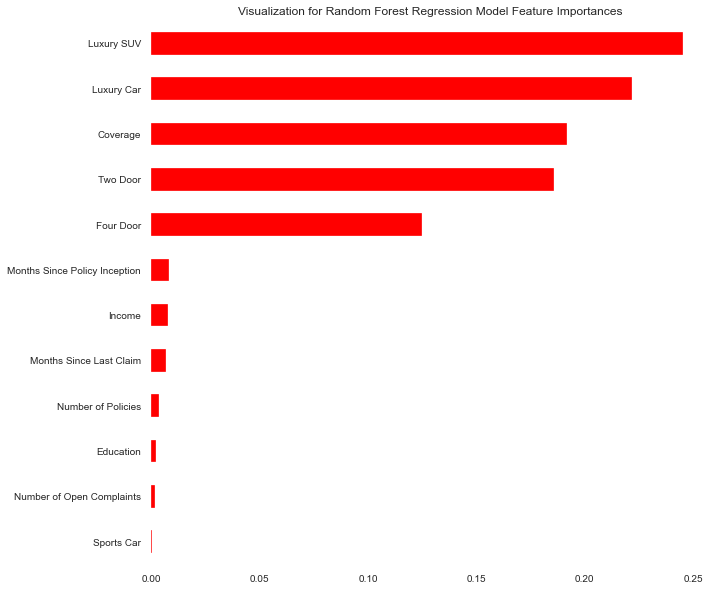

In [76]:
# Visualization for Random Regression model.

figure(figsize=(10,10))

rfGraph.sort_values().plot.barh(color='red')

plt.title('Visualization for Random Forest Regression Model Feature Importances')

### **Customer Lifetime Value Model**

Baseline Model for Customer Lifetime Value

In [77]:
# mean baseline for Customer Lifetime Value

mean_CLV = CLV_train.mean()

# mean absolute error for training data

true_value_CLV = CLV_train
predicted_value_CLV= [mean_CLV] * len(true_value_CLV)

mae_CLV = mean_absolute_error(true_value_CLV, 
                                       predicted_value_CLV)

print(f"Mean Absolute Error Training Data for Customer Lifetime Value")
print(f"""By guessing, the customer lifetime value would,
be ${round(mean_CLV, 2)} and we would be off 
by ${round(mae_CLV, 2)}\n""")

# mean squared error for training data

mse_CLV = mean_squared_error(true_value_CLV, 
                                      predicted_value_CLV)

print(f"Mean Squared Error Training Data for Customer Lifetime Vlaue")
print(f"""By guessing, our insurance premium would
be ${round(mean_CLV, 2)} and we would be off 
by ${round(mse_CLV, 2)}""")



Mean Absolute Error Training Data for Customer Lifetime Value
By guessing, the customer lifetime value would,
be $7954.82 and we would be off 
by $4345.01

Mean Squared Error Training Data for Customer Lifetime Vlaue
By guessing, our insurance premium would
be $7954.82 and we would be off 
by $45802855.31


Random Forest Regressor Model for Customer Lifetime Value

In [83]:
y_train = CLV_train
y_test = CLV_test
from sklearn.ensemble import RandomForestRegressor

rf_CLV = RandomForestRegressor(random_state=42)

# fitting random regression model

rfModel_CLV = rf_CLV.fit(x_train, y_train)

# predicting y_values using test dataset. 

y_pred_r_CLV = rfModel_CLV.predict(x_test)


Metrics for Customer Lifetime Value model

In [84]:
mae_r_CLV = mean_absolute_error(y_test, y_pred_r_CLV)
mse_r_CLV = mean_squared_error(y_test, y_pred_r_CLV)
print(f'Random Forest Regression MEAN prediction ${round(y_pred_r_CLV.mean())}')
print(f'Random Forest Regression mean absolute error ${round(mae_r_CLV,2)}')
print(f"Random Forest Regression mean squared error ${round(mse_r_CLV,2)}")


Random Forest Regression MEAN prediction $7928.0
Random Forest Regression mean absolute error $1651.14
Random Forest Regression mean squared error $17174875.61


Visualization for Random Forest Regressor model for Customer Lifetime Value

In [85]:
# interpreting random forest model. 

importances_CLV = rfModel_CLV.feature_importances_

# columns used in random forest model.
columns_CLV = x_train.columns

# series between columns and feature importances

rfGraph_CLV = pd.Series(importances_CLV, columns_CLV)

Text(0.5, 1.0, 'Visualization for Random Forest Regression \nModel Feature Importances for CUSTOMER LIFETIME VALUE ')

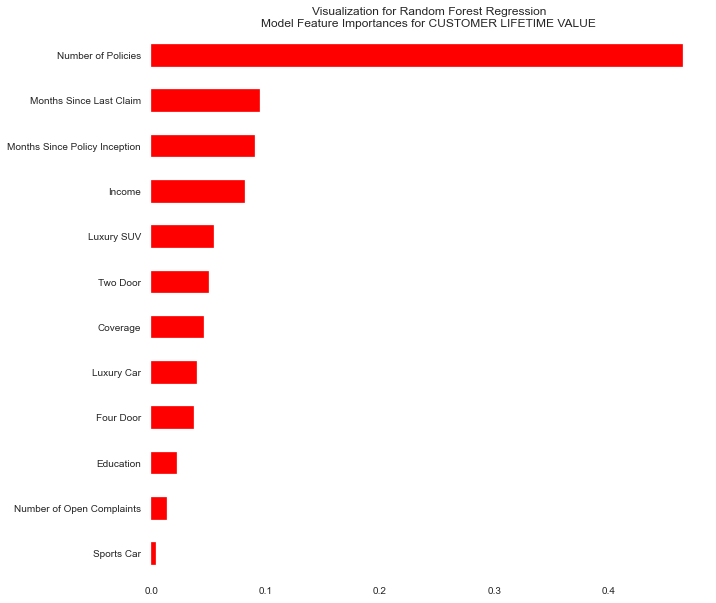

In [87]:
# Visualization for Random Regression model.

figure(figsize=(10,10))

rfGraph_CLV.sort_values().plot.barh(color='red')

plt.title("""Visualization for Random Forest Regression 
Model Feature Importances for CUSTOMER LIFETIME VALUE """)

# Visualizations

## Shap Plot Visualizations

In [88]:
import shap

In [104]:
# function to do shapley plots. 

def shapley(x_train, y_train, x_test, row_number=0):
    
    model = RandomForestRegressor(random_state=42)
    
    model.fit(x_train, y_train)

    # defining what row to examine in the shapley plot
    row = x_test.iloc[[row_number]]

    # predicting
    pred = model.predict(row)

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(row)

    feature_names = row.columns
    feature_values = row.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

    # printing the result

    """result = f'{pred[0]:.1f} is the predicted Insurance Premium. \n\n'
    result += f'Starting from baseline of ${explainer.expected_value:.1f} \n\n'
    result += shaps.to_string()
    print(result)"""

    shap.initjs()

    return shap.force_plot(
      base_value = explainer.expected_value,
      shap_values = shap_values,
      features=row)



### Shap plot visualization for Insurance Premium

In [91]:
x_test.head()

,Luxury SUV,Luxury Car,Coverage,Sports Car,Two Door,Four Door,Months Since Policy Inception,Income,Months Since Last Claim,Number of Policies,Education,Number of Open Complaints
708,0,0,1,0,0,0,49,74585,1,1,1,0
47,0,0,1,0,1,0,10,23218,7,4,1,0
3995,0,0,2,0,1,0,38,94903,3,1,2,0
1513,0,0,2,0,0,1,27,77153,3,5,2,1
3686,0,0,1,0,0,1,14,23769,18,2,1,0


In [92]:
x_test.iloc[0]

Luxury SUV                           0
Luxury Car                           0
Coverage                             1
Sports Car                           0
Two Door                             0
Four Door                            0
Months Since Policy Inception       49
Income                           74585
Months Since Last Claim              1
Number of Policies                   1
Education                            1
Number of Open Complaints            0
Name: 708, dtype: int64

In [103]:
# highest insurance premium value prediction
y_pred_r.max()

284.99

In [100]:
# the row with the highest insurance premium prediction
y_pred_r.argmax()

357

In [105]:
# highest insurance premium prediction

shapley(x_train, premium_train, x_test, row_number=357)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [106]:
# lowest insurance premium value prediction
y_pred_r.min()

61.0

In [107]:
# the row with the low insurance premium prediction
y_pred_r.argmin()

931

In [108]:
# rows to try, row number 0, 10, 100, 357, 931
shapley(x_train, premium_train, x_test, row_number=931)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [114]:
# mean value insurance premium value prediction
round(y_pred_r.mean(), 2)

91.9

In [113]:
# rows to try, row number 0, 10, 100
shapley(x_train, premium_train, x_test, row_number=10)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


### Shap plot visualization for Customer Lifetime Value

In [ ]:
# rows to try, row number 0, 10, 100
shapley(x_train, premium_train, x_test, row_number=100)

## Plotly Visualizations

# Export Models for Data Science APP